Dataset Head:
    CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Summary Statistics:
        CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000  

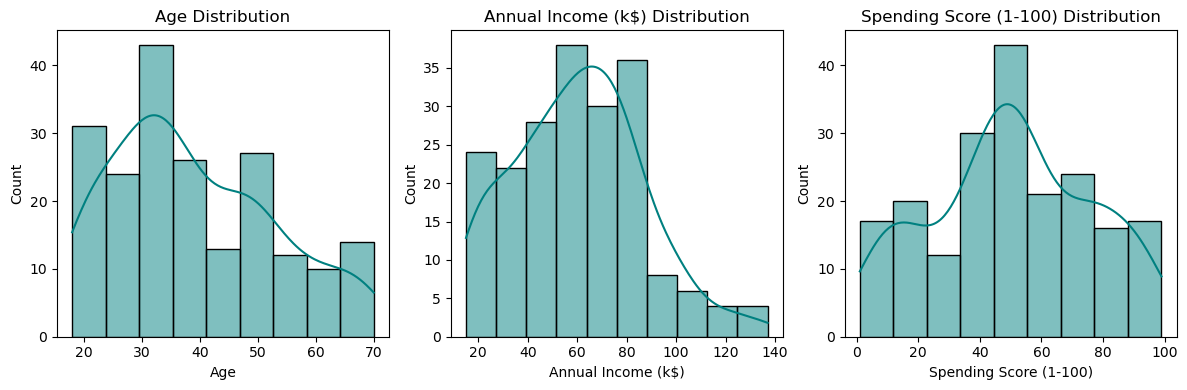

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# 1. Download the dataset directly
url = "https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv"
df = pd.read_csv(url)

# 2. Exploratory Data Analysis (EDA)
print("Dataset Head:\n", df.head())
print("\nSummary Statistics:\n", df.describe())

# Visualizing distributions
plt.figure(figsize=(12, 4))
for i, col in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True, color='teal')
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

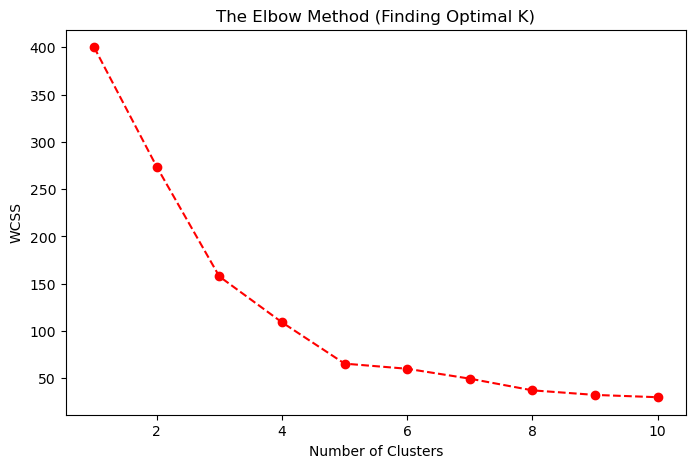

In [6]:
# Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scaling is important for distance-based algorithms like K-Means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate WCSS for different K values
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='red')
plt.title('The Elbow Method (Finding Optimal K)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

C:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


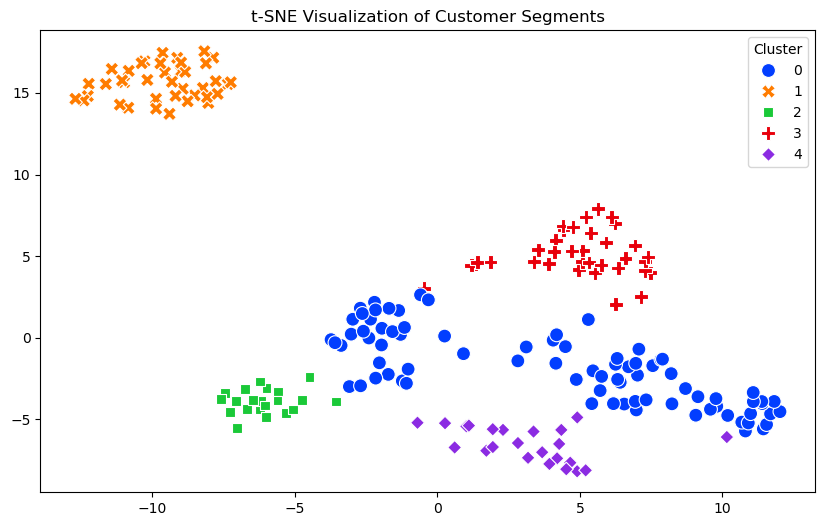

In [7]:
# 1. Apply K-Means with K=5 (based on the elbow above)
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# 2. t-SNE for Visualization
# We include Age in the t-SNE to see if it adds more detail to the segments
X_all = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
X_all_scaled = scaler.fit_transform(X_all)

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_all_scaled)

# 3. Plotting the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df['Cluster'], 
                palette='bright', s=100, style=df['Cluster'])
plt.title('t-SNE Visualization of Customer Segments')
plt.show()

In [8]:
# Analyze the cluster characteristics
analysis = df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("\nCluster Average Characteristics:\n", analysis)

# Logic for Marketing Strategies
strategies = {
    0: "Target with high-end luxury items and personal shopping services.",
    1: "Focus on discounts, bulk-buy offers, and value-for-money items.",
    2: "Standard loyalty programs and regular email newsletters for new arrivals.",
    3: "Flash sales and influencer-led social media ads.",
    4: "Educational marketing showing the long-term value of premium products."
}

for cluster, strategy in strategies.items():
    print(f"Cluster {cluster} Strategy: {strategy}")


Cluster Average Characteristics:
                Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                       
0        42.716049           55.296296               49.518519
1        32.692308           86.538462               82.128205
2        25.272727           25.727273               79.363636
3        41.114286           88.200000               17.114286
4        45.217391           26.304348               20.913043
Cluster 0 Strategy: Target with high-end luxury items and personal shopping services.
Cluster 1 Strategy: Focus on discounts, bulk-buy offers, and value-for-money items.
Cluster 2 Strategy: Standard loyalty programs and regular email newsletters for new arrivals.
Cluster 3 Strategy: Flash sales and influencer-led social media ads.
Cluster 4 Strategy: Educational marketing showing the long-term value of premium products.
